
# Задача 21

In [1]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Мы будем работать с датасетом __"forestfires"__, в котором есть записи погодных измерений для разных лесных массивов и объёмы их выгорания. Последние мы будем предсказываььть

Мы будем работать с датасетом __"forestfires.csv"__, в котором есть записи погодных измерений для разных лесных массивов и объёмы их выгорания. Последние мы будем предсказывать. Данные взяты здесь https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/

### Знакомство с данными

In [2]:
df = pd.read_csv("forestfires.csv")
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Для каждого лесного массива известно:

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: "jan" to "dec" 
4. day - day of the week: "mon" to "sun"
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3 
7. DC - DC index from the FWI system: 7.9 to 860.6 
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40 
12. rain - outside rain in mm/m2 : 0.0 to 6.4 
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform). 

Нужно перекодировать месяца и дни недели

In [3]:
for i in range(np.size(df.loc[:, 'month'])):
    if(df.loc[i, 'month'] == 'jan'):
        df.loc[i, 'month'] = 1
    if(df.loc[i, 'month'] == 'feb'):
        df.loc[i, 'month'] = 2
    if(df.loc[i, 'month'] == 'mar'):
        df.loc[i, 'month'] = 3
    if(df.loc[i, 'month'] == 'apr'):
        df.loc[i, 'month'] = 4
    if(df.loc[i, 'month'] == 'may'):
        df.loc[i, 'month'] = 5
    if(df.loc[i, 'month'] == 'jun'):
        df.loc[i, 'month'] = 6
    if(df.loc[i, 'month'] == 'jul'):
        df.loc[i, 'month'] = 7
    if(df.loc[i, 'month'] == 'aug'):
        df.loc[i, 'month'] = 8
    if(df.loc[i, 'month'] == 'sep'):
        df.loc[i, 'month'] = 9
    if(df.loc[i, 'month'] == 'oct'):
        df.loc[i, 'month'] = 10
    if(df.loc[i, 'month'] == 'nov'):
        df.loc[i, 'month'] = 11
    if(df.loc[i, 'month'] == 'dec'):
        df.loc[i, 'month'] = 12
        
for i in range(np.size(df.loc[:, 'day'])):
    if(df.loc[i, 'day'] == 'mon'):
        df.loc[i, 'day'] = 1
    if(df.loc[i, 'day'] == 'tue'):
        df.loc[i, 'day'] = 2
    if(df.loc[i, 'day'] == 'wed'):
        df.loc[i, 'day'] = 3
    if(df.loc[i, 'day'] == 'thu'):
        df.loc[i, 'day'] = 4
    if(df.loc[i, 'day'] == 'fri'):
        df.loc[i, 'day'] = 5
    if(df.loc[i, 'day'] == 'sat'):
        df.loc[i, 'day'] = 6
    if(df.loc[i, 'day'] == 'sun'):
        df.loc[i, 'day'] = 7

Визуализируем данные снова

In [4]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


Посмотрим на графиках, как целевой признак зависит от остальных

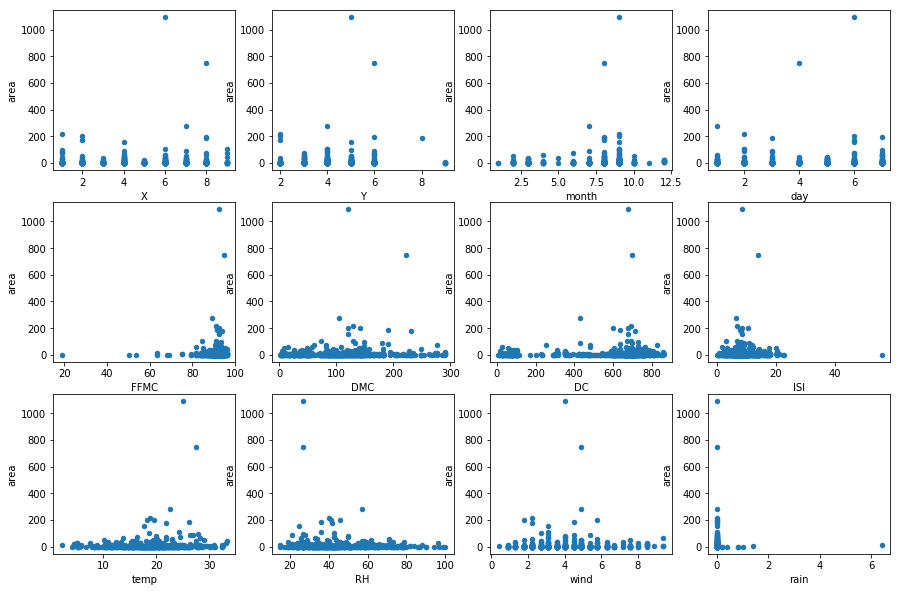

In [5]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))
for idx, feature in enumerate(df.columns[:-1]):
    df.plot(feature, "area", subplots=True, kind="scatter", ax=axes[int(idx / 4), idx % 4])

In [6]:
import sklearn
from sklearn.preprocessing import scale
from sklearn.utils import shuffle

In [7]:
df_shuffled = shuffle(df, random_state=123)
X = scale(df_shuffled[df_shuffled.columns[:-1]])
y = df_shuffled["area"]

In [8]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [9]:
lin_regression = linear_model.LinearRegression()
lin_regression.fit(X, y)
list(zip(df.columns,lin_regression.coef_))

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


[('X', 4.542803505368402),
 ('Y', 0.3418701423397692),
 ('month', 6.22562487358311),
 ('day', 1.5636817119160846),
 ('FFMC', -0.3650015981131006),
 ('DMC', 6.2440356074451016),
 ('DC', -7.360637575229294),
 ('ISI', -3.3233551461834967),
 ('temp', 4.96913480723173),
 ('RH', -3.5013734063040802),
 ('wind', 2.121177456812313),
 ('rain', -0.8680293220554266)]

In [65]:
from numpy import linalg
alphas = np.arange(1, 700, 50, dtype=np.float64)
weights_matrix = np.zeros(shape = [np.size(alphas), 12])
for alpha, i in zip(alphas, range(12)):
    weights_matrix[i,:] = (np.matmul(np.linalg.inv((np.matmul(X.transpose(),X) + alpha * np.eye(12))),np.matmul(X.transpose(), y) ))


Text(0,0.5,'feature weight')

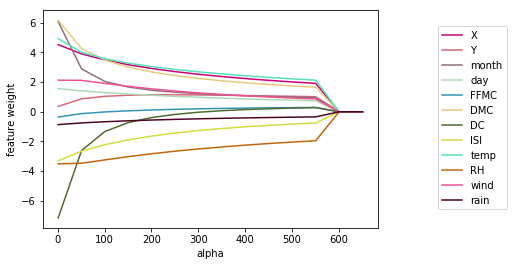

In [66]:
for coef, feature in zip(weights_matrix.T , df.columns):
    plt.plot(alphas, coef, label=feature, color=np.random.rand(3))
    
plt.legend(loc="upper right", bbox_to_anchor=(1.4, 0.95))
plt.xlabel("alpha")
plt.ylabel("feature weight")

array([ 4.53427131,  0.3523643 ,  6.14909206,  1.56163898, -0.36072491,
        6.20569548, -7.25452165, -3.31449488,  4.95130546, -3.50544381,
        2.12581713, -0.86647107])